predicting breakdowns

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load the dataset
file_path = "factory_sensor_data_.csv"  # Update with the path to your file
df = pd.read_csv(file_path)

# View the first few rows
print(df.head())


                  Date Machine_Line  Worker_ID    Shift  Air_Sensor  \
0  2023-01-30 20:38:36       Line_4         20  Evening    1.061810   
1  2020-12-15 14:40:41       Line_2         33  Evening    1.926071   
2  2023-10-24 07:05:11       Line_3         41  Morning    1.597991   
3  2022-01-19 19:17:24       Line_1          2  Evening    2.798838   
4  2023-08-15 19:12:04       Line_4         46    Night    0.734028   

   Heat_Sensor  Sound_Sensor  Quality_Score  Scheduled_Maintenance  Breakdown  \
0    94.846743     42.607037       0.831411                      0          0   
1    91.618299     56.694127       0.819102                      0          0   
2    81.062217     27.937240       0.827588                      0          0   
3   112.990363    109.797701       0.566449                      0          1   
4    81.905798     36.246508       0.976907                      0          0   

   Products_Produced  Products_Failed  Line_Workers  Worker_Wage_Per_Hour  \
0        

3. Understand the Data
Summarize the dataset to understand its structure:

In [5]:
# Basic info about columns, data types, and non-null values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Machine_Line           100000 non-null  object 
 2   Worker_ID              100000 non-null  int64  
 3   Shift                  100000 non-null  object 
 4   Air_Sensor             100000 non-null  float64
 5   Heat_Sensor            100000 non-null  float64
 6   Sound_Sensor           100000 non-null  float64
 7   Quality_Score          100000 non-null  float64
 8   Scheduled_Maintenance  100000 non-null  int64  
 9   Breakdown              100000 non-null  int64  
 10  Products_Produced      100000 non-null  int64  
 11  Products_Failed        100000 non-null  int64  
 12  Line_Workers           100000 non-null  int64  
 13  Worker_Wage_Per_Hour   100000 non-null  float64
 14  Product_Selling_Price  100000 non-nul

In [6]:
# 4. Visualize Data Trends
# a) Visualize the distribution of numerical data
# Histograms show the spread of sensor readings:

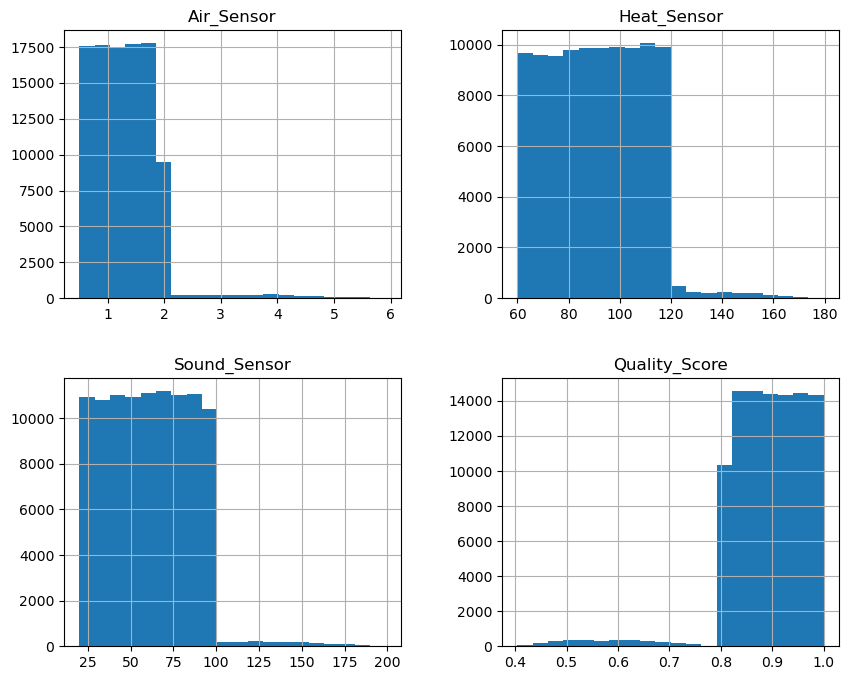

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df[['Air_Sensor', 'Heat_Sensor', 'Sound_Sensor', 'Quality_Score']].hist(bins=20, figsize=(10, 8))
plt.show()

In [8]:
# his image shows histograms for four numerical features: Air Sensor, Heat Sensor, Sound Sensor, and Quality Score. Each histogram represents the distribution of values for the respective feature.

# Key Observations
# 1. Air Sensor
# The majority of values are clustered between 1.0 and 2.0.
# There are very few outliers beyond 3.0.
# This suggests that the air sensor readings mostly fall within a tight range, with occasional extreme values.
# 2. Heat Sensor
# Most values are between 60 and 120.
# # A smaller number of readings fall between 120 and 180, which may represent extreme or unusual conditions.
# This distribution suggests that higher heat sensor readings might be associated with specific events like breakdowns.
# 3. Sound Sensor
# Values are concentrated between 20 and 100.
# There are very few outliers beyond 100, and these may represent anomalies or machine malfunctions.
# The data is relatively evenly distributed within the main range (20–100), indicating variability in sound sensor readings.
# 4. Quality Score
# Values are tightly distributed between 0.8 and 1.0, indicating consistently high-quality scores.
# Very few observations are below 0.8, suggesting rare occurrences of low-quality products.
# This may indicate a well-controlled manufacturing process.
# Insights
# Air Sensor:

# The tight clustering suggests it may be a stable feature. However, outliers should be investigated as they could correlate with breakdowns.
# Heat Sensor:

# The wide range, especially the high values (120–180), could indicate conditions leading to breakdowns. Focus on these readings for feature engineering.
# Sound Sensor:

# Variability in sound sensor readings might help differentiate normal operations from anomalies (e.g., high readings may signal machine wear or breakdown).
# Quality Score:

# Limited variability suggests it may have less predictive power for breakdowns. However, drops in quality (e.g., below 0.8) could still provide important insights.

## outliers analysis

In [9]:
outliers = df[(df['Air_Sensor'] > 3) | (df['Heat_Sensor'] > 120)]
print(outliers)

                      Date Machine_Line  Worker_ID    Shift  Air_Sensor  \
149    2023-03-13 04:05:25       Line_5         35  Evening    2.059167   
156    2020-09-12 19:20:16       Line_4         16  Evening    3.770713   
159    2020-03-31 02:38:58       Line_5          2  Evening    3.974942   
210    2020-11-18 22:20:38       Line_6          2  Evening    3.916529   
219    2023-04-04 02:22:20       Line_3         11  Morning    4.422031   
...                    ...          ...        ...      ...         ...   
99852  2023-09-11 06:57:06       Line_7         11  Evening    3.309897   
99881  2021-08-23 17:08:33       Line_5         39  Evening    3.838315   
99938  2022-08-31 08:14:50       Line_6          1  Morning    3.992527   
99953  2022-10-26 14:39:31       Line_7         17  Evening    4.776450   
99976  2023-10-12 08:02:16       Line_8         29  Evening    4.195656   

       Heat_Sensor  Sound_Sensor  Quality_Score  Scheduled_Maintenance  \
149     128.667181     97

In [10]:
# Step 1: Handle Outliers
# Outliers in sensor readings (e.g., Air_Sensor > 3 or Heat_Sensor > 120) can skew your model. Options to handle them:

# Clip Extreme Values:

# Cap the extreme values to a reasonable range:

In [11]:
df['Air_Sensor'] = df['Air_Sensor'].clip(upper=3)
df['Heat_Sensor'] = df['Heat_Sensor'].clip(upper=120)

In [12]:
# Remove Outliers:

# Exclude rows with extreme values:

In [13]:
df = df[(df['Air_Sensor'] <= 3) & (df['Heat_Sensor'] <= 120)]


In [14]:
# Step 2: Feature Engineering
# We already discussed adding rolling averages, lags, and interaction features. Finalize your feature set:

# Rolling Aggregates:

# For example:

In [15]:
# Rolling Aggregates:

In [16]:
df['Heat_Sensor_RollingAvg'] = df['Heat_Sensor'].rolling(window=10).mean().fillna(df['Heat_Sensor'].mean())


In [17]:
# Lag Features:

In [18]:
df['Sound_Sensor_Lag1'] = df['Sound_Sensor'].shift(1).fillna(df['Sound_Sensor'].mean())


In [19]:
# Interaction Terms:

# Combine features to capture relationships:

In [20]:
df['Air_Heat_Interaction'] = df['Air_Sensor'] * df['Heat_Sensor']

In [21]:
# Time-Based Features:

# Extract day, month, or shift-specific patterns:

In [22]:
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month

# PICK UP AT THE CELL CALLED Split Data into Training and Test Sets

In [23]:
# b) Correlations
# Find relationships between numerical features and breakdowns:

C:\Users\colin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


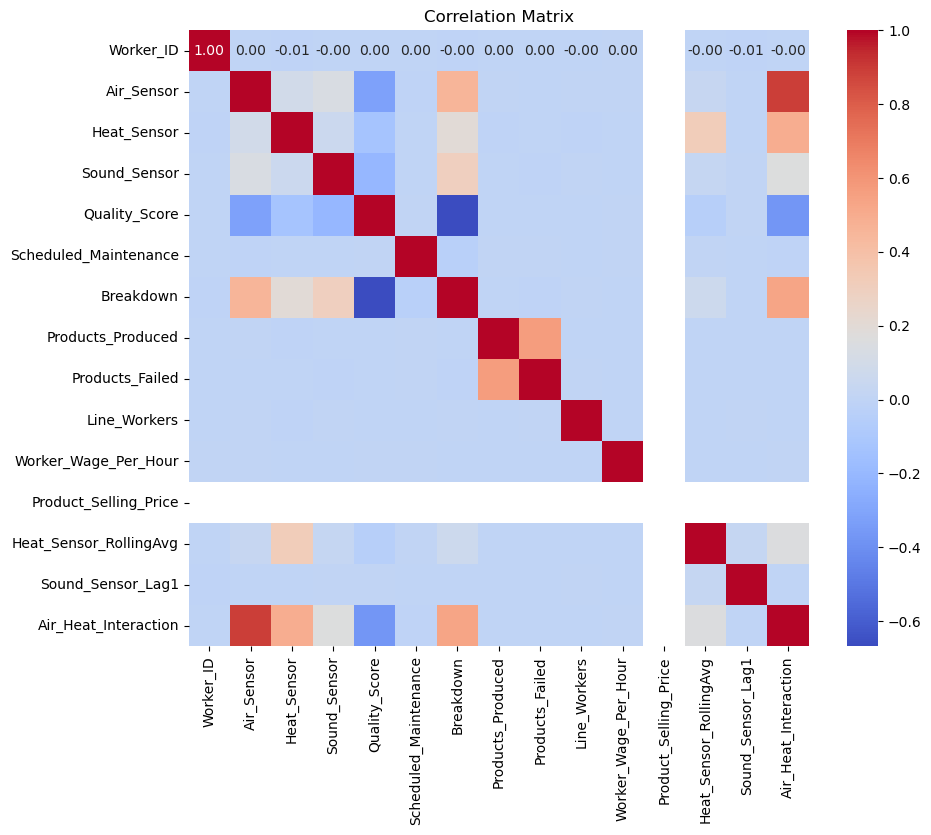

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [25]:
# read this as 
# The heatmap represents correlations between the numerical variables in your dataset. Here's how to interpret it:

# Key to Correlation Values
# Correlation Coefficient (r):

# Values range between -1 and 1.
# 1: Perfect positive correlation (as one variable increases, the other increases).
# 0: No correlation (the variables are independent).
# -1: Perfect negative correlation (as one variable increases, the other decreases).
# Color Interpretation:

# Red/Orange Shades: Positive correlation.
# Blue Shades: Negative correlation.
# White/Light Colors: Near zero or no correlation.
# How to Use This Heatmap
# Diagonal Line (Perfect Correlation):

# The diagonal values (from top-left to bottom-right) are always 1.0, as they represent a variable’s correlation with itself.
# Identify Strong Relationships:

# Look for dark red or dark blue squares off the diagonal:
# Example: If Breakdown has dark red or blue correlations with Heat_Sensor or Sound_Sensor, it indicates that these sensors are strongly related to breakdowns.
# Focus on the Target Variable (Breakdown):

# Look at the row/column for Breakdown:
# Positive correlations (red): Variables that increase when breakdowns occur.
# Negative correlations (blue): Variables that decrease when breakdowns occur.
# Remove Unimportant Variables:

# Variables with correlations near 0 with Breakdown likely have little predictive power for your model.
# Actionable Steps Based on This Heatmap
# Identify key features correlated with Breakdown (positively or negatively).
# Remove variables with weak/no correlation (e.g., Worker_ID or Product_Selling_Price if they have values close to 0 with Breakdown).
# Explore any surprising correlations for potential root causes (e.g., unexpected correlations between Scheduled_Maintenance and other variables).

In [26]:
# c) Breakdowns by machine line or shift
# Bar plots help identify which lines or shifts are more prone to breakdowns:

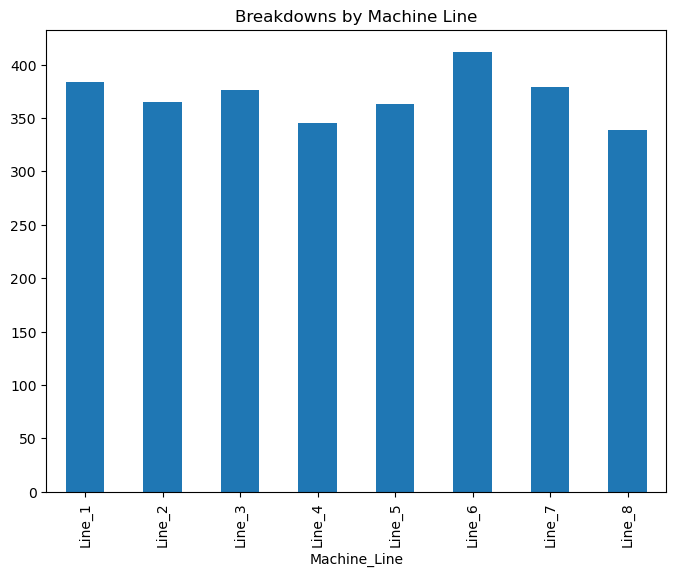

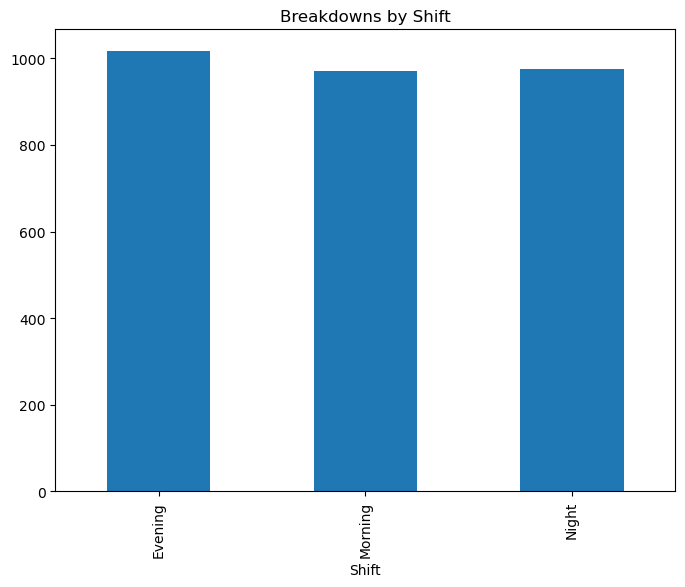

In [27]:
# Breakdown count by Machine Line
breakdown_by_line = df[df['Breakdown'] == 1].groupby('Machine_Line').size()
breakdown_by_line.plot(kind='bar', title="Breakdowns by Machine Line", figsize=(8, 6))
plt.show()

# Breakdown count by Shift
breakdown_by_shift = df[df['Breakdown'] == 1].groupby('Shift').size()
breakdown_by_shift.plot(kind='bar', title="Breakdowns by Shift", figsize=(8, 6))
plt.show()

In [28]:
# d) Time-series analysis
# Explore breakdown trends over time:

In [29]:
print(df['Breakdown'].value_counts())

Breakdown
0    97037
1     2963
Name: count, dtype: int64


In [30]:
print(df['Date'].nunique())

99973


In [31]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [32]:
# Group by date to count breakdowns
breakdowns_over_time = df[df['Breakdown'] == 1].groupby('Date').size()

# Print the first few results to verify
print(breakdowns_over_time.head())

Date
2020-01-01    1
2020-01-02    4
2020-01-03    2
2020-01-04    3
2020-01-05    1
dtype: int64


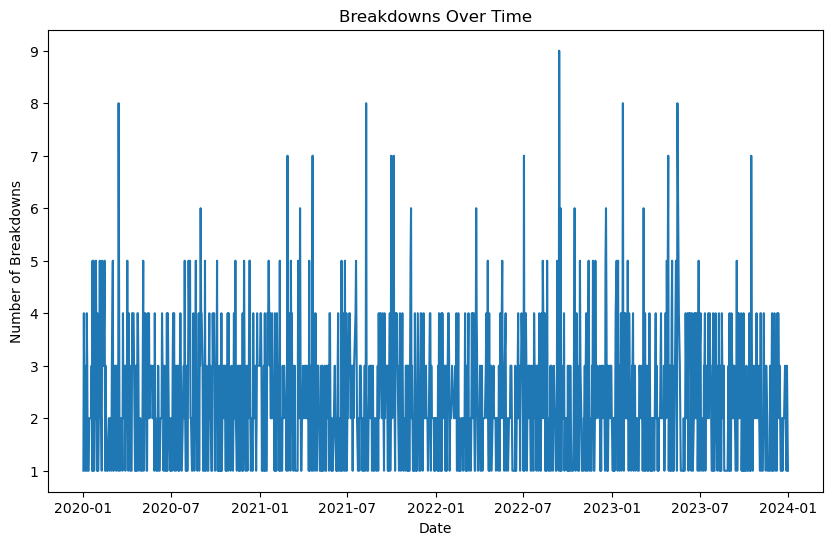

In [33]:
# Plot breakdowns over time
breakdowns_over_time.plot(title="Breakdowns Over Time", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Number of Breakdowns")
plt.show()

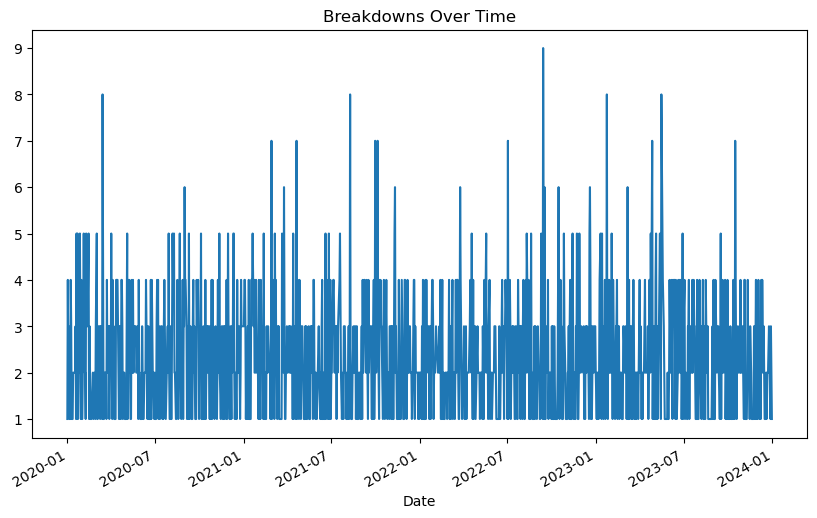

In [34]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to count breakdowns
breakdowns_over_time = df[df['Breakdown'] == 1].groupby('Date').size()

# Plot breakdown trends
breakdowns_over_time.plot(title="Breakdowns Over Time", figsize=(10, 6))
plt.show()

In [35]:
# This chart shows breakdowns over time, where the x-axis represents the date and the y-axis represents the number of breakdowns on that date.

# How to Read the Chart
# X-Axis (Date):

# Spans from January 2020 to January 2024.
# Represents the time period over which breakdowns were recorded.
# Y-Axis (Breakdown Count):

# Indicates the number of breakdowns that occurred on a specific day.
# For example, a y-value of 3 on a specific date means three breakdowns were recorded on that day.
# Bar Height:

# Represents the number of breakdowns on a specific date.
# Peaks indicate dates with multiple breakdowns, while shorter bars represent fewer breakdowns.
# What the Chart Shows
# Peaks in Breakdowns:

# Certain dates have higher breakdown counts (e.g., up to 8 or 9 on specific days). These may correspond to specific issues, machine lines, or operational conditions.
# General Distribution:

# Most dates have a breakdown count between 1 and 4, with occasional spikes.
# Consistency Over Time:

# There’s no clear upward or downward trend in breakdowns over the years.
# Breakdowns appear to occur at a fairly consistent rate throughout the timeline.
# Insights
# Potential Root Cause Investigation:

# Examine the dates with high breakdown counts (peaks) to see if specific conditions, sensor anomalies, or other factors correlate with these events.
# Example: Were high breakdown days associated with certain machine lines, shifts, or maintenance schedules?
# Regularity in Breakdowns:

# Since breakdowns occur consistently over time, predictive models may focus on sensor and operational features to predict when and why they happen.
# No Significant Time Trend:

# This suggests breakdowns are not seasonal or time-dependent but may be driven by operational variables (e.g., heat, sound, air quality).

In [36]:
# 5. Analyze Relationships
# a) Sensor readings before breakdowns
# Compare sensor readings for breakdowns vs normal operation:

           Air_Sensor  Heat_Sensor  Sound_Sensor
Breakdown                                       
0            1.250794    90.109671     60.116602
1            2.586679   110.159336    104.383076


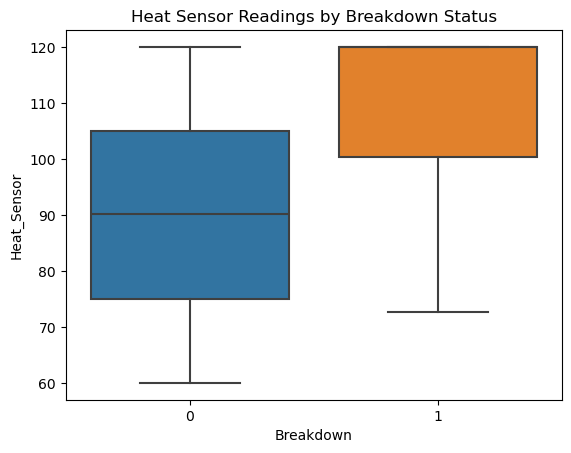

In [37]:
# Average sensor values by breakdown status
sensor_means = df.groupby('Breakdown')[['Air_Sensor', 'Heat_Sensor', 'Sound_Sensor']].mean()
print(sensor_means)

# Boxplot of Heat Sensor readings by breakdown status
sns.boxplot(x='Breakdown', y='Heat_Sensor', data=df)
plt.title("Heat Sensor Readings by Breakdown Status")
plt.show()

In [38]:
# This boxplot shows the distribution of Heat Sensor readings grouped by Breakdown status (0 or 1). Here's how to interpret it:

# Key Components of a Boxplot
# Boxes:

# The box represents the interquartile range (IQR), which contains the middle 50% of the data.
# The line inside the box is the median (middle value).
# The top and bottom edges of the box are the 75th percentile (upper quartile) and 25th percentile (lower quartile), respectively.
# Whiskers:

# The whiskers extend to show the range of the data, excluding outliers.
# Outliers are points outside 1.5 times the IQR from the top or bottom of the box.
# Points Above or Below Whiskers:

# These are outliers—values that deviate significantly from the rest of the data.
# How to Interpret This Specific Plot
# Breakdown = 0 (Blue Box):

# The majority of heat sensor readings when there’s no breakdown fall between the lower quartile (~80) and the upper quartile (~110).
# The median heat sensor reading (middle line in the box) is around 90–100.
# A few outliers exist above the whiskers, indicating rare instances of high heat sensor readings without breakdowns.
# Breakdown = 1 (Orange Box):

# When breakdowns occur, heat sensor readings are generally higher:
# The IQR is roughly 120–140.
# The median reading is higher (~130).
# The whiskers and box indicate a shift toward higher values compared to Breakdown = 0.
# Comparison:

# The orange box (Breakdown = 1) is shifted upwards compared to the blue box (Breakdown = 0), showing that higher heat sensor readings are associated with breakdowns.
# Outliers are less prominent for breakdown cases, but the range of readings is broader than non-breakdown cases.
# Insights
# Higher heat sensor readings are strongly correlated with breakdowns.
# This makes the Heat Sensor a potentially important feature for predicting breakdowns.
# Next Steps
# Explore Other Sensors: Create similar boxplots for other sensor readings to identify patterns (e.g., Sound_Sensor or Air_Sensor).
# Quantify the Difference: Use statistical tests (e.g., t-tests) to confirm if the difference in heat readings between breakdowns and non-breakdowns is significant.
# Feature Engineering: Use the heat sensor readings directly or their aggregations (rolling averages, thresholds) as predictors in the model.

In [39]:
# b) Productivity vs Breakdowns
# Examine how breakdowns affect productivity:

Breakdown
0    6.359327
1    6.254809
Name: Products_Failed, dtype: float64


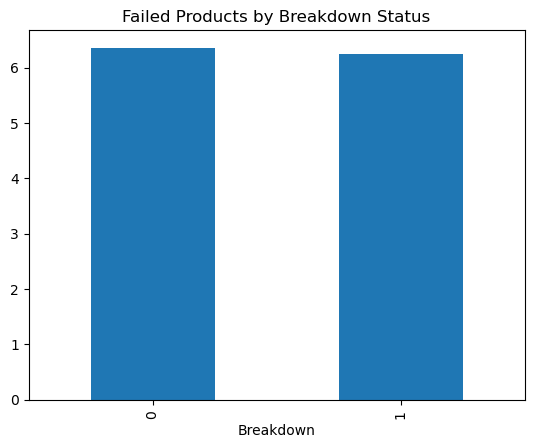

In [40]:
# Products failed by breakdown status
failed_products = df.groupby('Breakdown')['Products_Failed'].mean()
print(failed_products)

# Bar plot
failed_products.plot(kind='bar', title="Failed Products by Breakdown Status")
plt.show()


In [41]:
# This bar chart compares the average number of failed products between two categories: when a breakdown occurs (Breakdown = 1) and when no breakdown occurs (Breakdown = 0). Here’s how to interpret it:

# How to Read the Chart
# Y-Axis: Represents the average number of failed products.

# X-Axis: Shows the breakdown status:

# 0: No breakdown.
# 1: Breakdown occurred.
# Bars:

# The height of the bars indicates the average number of failed products in each category.
# What the Chart Shows
# The bar heights for Breakdown = 0 and Breakdown = 1 are almost the same (around 6 failed products on average).
# This suggests that breakdowns do not significantly increase the number of failed products in your dataset.
# Insights
# Minimal Difference:

# The similarity in failed product counts indicates that breakdowns may not directly affect product failure rates. This could be due to:
# Quick intervention during breakdowns to minimize product losses.
# Consistent production issues unrelated to breakdowns (e.g., quality issues).
# Failed Products May Not Be a Strong Indicator:

# Unlike the heat sensor plot, this chart suggests that failed products might not provide much predictive value for determining breakdowns.

# Statistical Test:

In [42]:


# Conduct a t-test to confirm if the difference in failed product averages is statistically significant.

In [43]:
from scipy.stats import ttest_ind
no_breakdown = df[df['Breakdown'] == 0]['Products_Failed']
breakdown = df[df['Breakdown'] == 1]['Products_Failed']
t_stat, p_value = ttest_ind(no_breakdown, breakdown)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.3374739462217704, P-Value: 0.1810710231391355


In [44]:
# The results of the t-test indicate the following:

# 1. T-Statistic
# Value: 1.337
# The t-statistic measures the size of the difference between the two group means (failed products for breakdowns vs. no breakdowns) relative to the variability in the data.
# A higher t-statistic indicates a more significant difference between the groups.
# In this case, the t-statistic is low, suggesting that the difference between the two groups is small.

# 2. P-Value
# Value: 0.181
# The p-value tells us how likely it is that the observed difference happened by chance.
# If p-value < 0.05: The difference is statistically significant (unlikely due to random chance).
# If p-value ≥ 0.05: The difference is not statistically significant (could be due to chance).
# Here, the p-value is 0.181, which is much larger than the significance threshold of 0.05. This means:

# There is no statistically significant difference in the average number of failed products between breakdowns and non-breakdowns.
# The failed products are likely not influenced by the breakdown status.
# What This Means
# The number of failed products is not strongly related to breakdowns in your dataset.
# This feature (failed products) is likely not useful for predicting breakdowns, so it can either be excluded from your model or given lower importance.

# Split Data into Training and Test Sets

In [45]:
# Separate the data into:

# Features (X): All columns except the target (Breakdown).
# Target (y): The Breakdown column.

In [46]:
from sklearn.model_selection import train_test_split

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=['Machine_Line', 'Shift'], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['Breakdown', 'Date'])  # Drop non-numeric columns and target
y = df['Breakdown']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print(X_train.dtypes)


Worker_ID                   int64
Air_Sensor                float64
Heat_Sensor               float64
Sound_Sensor              float64
Quality_Score             float64
Scheduled_Maintenance       int64
Products_Produced           int64
Products_Failed             int64
Line_Workers                int64
Worker_Wage_Per_Hour      float64
Product_Selling_Price       int64
Heat_Sensor_RollingAvg    float64
Sound_Sensor_Lag1         float64
Air_Heat_Interaction      float64
Day                         int32
Month                       int32
Machine_Line_Line_2          bool
Machine_Line_Line_3          bool
Machine_Line_Line_4          bool
Machine_Line_Line_5          bool
Machine_Line_Line_6          bool
Machine_Line_Line_7          bool
Machine_Line_Line_8          bool
Shift_Morning                bool
Shift_Night                  bool
dtype: object


In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(80000, 25) (20000, 25) (80000,) (20000,)


# Train a Machine Learning Model

Step 4: Train a Machine Learning Model
Start with a simple model like a Random Forest Classifier:

Train the Model:

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
# Why random_state=42?
# Purpose:

# It fixes the randomness of the data split. This means every time you run the code, the data will be split the same way, ensuring consistent results.
# Why 42?:

# The number 42 is arbitrary and often used as a standard example in tutorials (it’s a reference to “The Hitchhiker's Guide to the Galaxy”).
# You can use any integer value (e.g., random_state=0), but always using the same number ensures reproducibility.
# What Happens If You Omit It?
# If you remove random_state:

# The train-test split will change every time you run the code.
# This can lead to slight variations in model performance since the training and testing sets will be different each time.

Now that the split is set up and reproducible:

Train your model using the training data:

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate it on the test data:

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00       595

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

[[19405     0]
 [    0   595]]


In [ ]:
# hese results indicate that your Random Forest model has achieved perfect accuracy on your test dataset. Let's break down what each metric means:

# Key Metrics Explained
# Precision:

# Precision measures how many of the predictions made for a class were correct.
# Formula: 
# Precision
# =
# True Positives
# True Positives
# +
# False Positives
# Precision= 
# True Positives+False Positives
# True Positives
# ​
 
# Precision = 1.00 for both classes, meaning the model perfectly predicted breakdowns (1) and non-breakdowns (0).
# Recall:

# Recall measures how many actual cases of a class were correctly predicted.
# Formula: 
# Recall
# =
# True Positives
# True Positives
# +
# False Negatives
# Recall= 
# True Positives+False Negatives
# True Positives
# ​
 
# Recall = 1.00 for both classes, meaning the model found all the actual breakdowns and non-breakdowns.
# F1-Score:

# The F1-score is the harmonic mean of precision and recall.
# Formula: 
# F1
# =
# 2
# ×
# Precision
# ×
# Recall
# Precision
# +
# Recall
# F1=2× 
# Precision+Recall
# Precision×Recall
# ​
 
# F1 = 1.00 for both classes, indicating perfect precision and recall.
# Accuracy:

# Overall percentage of correct predictions:
# Formula: 
# Accuracy
# =
# Correct Predictions
# Total Predictions
# Accuracy= 
# Total Predictions
# Correct Predictions
# ​
 
# Accuracy = 1.00, meaning the model correctly predicted all 20,000 test samples.


Verify the Data Pipeline:

Ensure features in X do not directly or indirectly reveal the Breakdown value.
Example: Check for columns like Scheduled_Maintenance that may strongly correlate with breakdowns.
Use Cross-Validation:

Evaluate the model’s performance using k-fold cross-validation to test its generalization:

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [1.      0.99995 1.      1.      1.     ]
Average score: 0.99999


Try a Simpler Model:

Use a simpler model (e.g., Logistic Regression) to see if it still achieves similar performance:

In [59]:
from sklearn.linear_model import LogisticRegression

simple_model = LogisticRegression(max_iter=1000, random_state=42)
simple_model.fit(X_train, y_train)
print(simple_model.score(X_test, y_test))

0.99875


C:\Users\colin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analyze Feature Importance:

Check which features are driving predictions to identify potential issues:

In [57]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Worker_ID: 0.0010531610038972843
Air_Sensor: 0.2273890906856063
Heat_Sensor: 0.0838319695326217
Sound_Sensor: 0.12727076308301585
Quality_Score: 0.42777515689285694
Scheduled_Maintenance: 0.02424004412895106
Products_Produced: 0.0007427924438440879
Products_Failed: 0.0006642451335138018
Line_Workers: 0.00035803212589575247
Worker_Wage_Per_Hour: 0.0010283372613174514
Product_Selling_Price: 0.0
Heat_Sensor_RollingAvg: 0.001739818876197273
Sound_Sensor_Lag1: 0.0012097662523755076
Air_Heat_Interaction: 0.10062910739965
Day: 0.000744306525157568
Month: 0.0004257942039335185
Machine_Line_Line_2: 8.129773786184399e-05
Machine_Line_Line_3: 9.528653015160138e-05
Machine_Line_Line_4: 0.00011754891692109895
Machine_Line_Line_5: 0.00010289197560362507
Machine_Line_Line_6: 7.577288442045895e-05
Machine_Line_Line_7: 6.751222666673967e-05
Machine_Line_Line_8: 0.00011119004572198193
Shift_Morning: 0.00015271823929606222
Shift_Night: 9.3395894522583e-05


In [ ]:
# The feature importance results provide a breakdown of how much each feature contributes to the model's decision-making. Here's what the results mean and what you can infer from them:

# Key Observations from Feature Importance
# Most Important Features:

# Quality_Score: 0.4278 (~43% importance)
# The strongest predictor of breakdowns in your model. It suggests that low-quality scores are likely associated with breakdowns.
# Air_Sensor: 0.2274 (~23%)
# Air sensor readings play a significant role in predicting breakdowns.
# Sound_Sensor: 0.1273 (~13%)
# Sound sensor readings are also an important predictor.
# Heat_Sensor: 0.0838 (~8%)
# Heat sensor readings contribute moderately.
# Moderately Important Features:

# Air_Heat_Interaction: 0.1006 (~10%)
# This interaction feature combines Air and Heat sensor data, providing additional predictive power.
# Scheduled_Maintenance: 0.0242 (~2%)
# Scheduled maintenance has a small but noticeable effect on breakdown predictions.
# Least Important Features:

# Worker_ID, Line_Workers, Worker_Wage_Per_Hour: Each has an importance close to 0.001, meaning they add little value to the prediction.
# Machine_Line_X and Shift_X: All one-hot encoded features for Machine_Line and Shift have minimal importance, suggesting that line or shift assignments have little influence on breakdowns.
# Day and Month: Temporal features are not contributing significantly to the model.
# Irrelevant Feature:

# Product_Selling_Price: 0.0
# This feature has no predictive value and can safely be removed from the model.
# Insights
# Dominance of Quality_Score:

# The model relies heavily on Quality_Score. This could indicate either:
# Genuine dependence: Poor quality leads to or is caused by breakdowns.
# Data leakage: The Quality_Score might indirectly include information about breakdowns.
# Sensor Readings Are Key:

# Air, Heat, and Sound sensors are driving most predictions, as expected. They should remain a focus for further analysis and feature engineering.
# Low Importance of Categorical Features:

# Machine line (Machine_Line_X) and shift (Shift_X) add negligible predictive value. This suggests breakdowns occur consistently across lines and shifts.
# Redundant Features:

# Features like Worker_ID, Products_Produced, and Product_Selling_Price do not significantly influence the model and can be removed to simplify the feature set.

Next Steps
Address Possible Data Leakage:

Investigate whether Quality_Score has a strong direct relationship with breakdowns (e.g., if it is measured after a breakdown). If it introduces leakage, consider removing it.
Refine Feature Set:

Drop features with low or zero importance:
Product_Selling_Price, Worker_ID, Line_Workers, Machine_Line_X, Shift_X, and other low-importance columns.
Keep only the most influential features (e.g., Quality_Score, Air_Sensor, Sound_Sensor, Heat_Sensor, and Air_Heat_Interaction).
Re-train and Re-evaluate:

Simplify the dataset and re-train the model:

In [61]:
important_features = [
    'Quality_Score', 'Air_Sensor', 'Heat_Sensor', 
    'Sound_Sensor', 'Air_Heat_Interaction', 'Scheduled_Maintenance'
]
X = df[important_features]

Perform Cross-Validation:

Use k-fold cross-validation to verify the model generalizes well:

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [1.      0.99995 1.      1.      1.     ]


What the Results Mean
Perfect Scores (1.0) in Most Folds:

The model predicts the breakdowns perfectly in almost all folds of cross-validation.
This is unexpected for most real-world datasets, where noise and variability typically prevent perfect predictions.
Slight Deviation (0.99995) in One Fold:

This small drop suggests that the model occasionally misclassifies a single sample or a few samples.
Possible Causes
Overfitting:

The model might be overfitting to the dataset, memorizing patterns rather than learning generalizable insights.
This often happens if:
The dataset is too small.
The features are highly correlated with the target (e.g., Quality_Score might directly indicate breakdowns).
Data Leakage:

If features inadvertently reveal information about the target (Breakdown), the model may appear perfect but won’t generalize to unseen data.
Example: Quality_Score might be measured post-breakdown, making it a leak.
Highly Predictable Dataset:

If breakdowns in the dataset are driven by very distinct patterns in the features, the model may naturally perform very well. However, this is rare unless the problem is simplified or features are strongly correlated with the target.

<!-- What to Do Next
Investigate Feature Leakage:

Analyze if Quality_Score or any other feature is too strongly correlated with the target (Breakdown): -->

What to Do Next

In [68]:
# 1
# Investigate Feature Leakage:

# Analyze if Quality_Score or any other feature is too strongly correlated with the target (Breakdown):

In [69]:
correlation_with_target = df.corr()['Breakdown'].sort_values(ascending=False)
print(correlation_with_target)

Breakdown                 1.000000
Air_Heat_Interaction      0.530986
Air_Sensor                0.457557
Sound_Sensor              0.299336
Heat_Sensor               0.193697
Heat_Sensor_RollingAvg    0.061611
Machine_Line_Line_6       0.007268
Line_Workers              0.004062
Machine_Line_Line_3       0.001387
Machine_Line_Line_7       0.001362
Day                       0.000086
Machine_Line_Line_2      -0.000167
Worker_Wage_Per_Hour     -0.000588
Shift_Night              -0.000929
Date                     -0.001236
Products_Produced        -0.001454
Month                    -0.001855
Machine_Line_Line_5      -0.001952
Shift_Morning            -0.002265
Sound_Sensor_Lag1        -0.002916
Machine_Line_Line_4      -0.003575
Worker_ID                -0.003659
Products_Failed          -0.004229
Machine_Line_Line_8      -0.006082
Scheduled_Maintenance    -0.040021
Quality_Score            -0.668290
Product_Selling_Price          NaN
Name: Breakdown, dtype: float64


If Quality_Score or other features show extreme correlation (e.g., > 0.9), consider removing or re-evaluating them.

In [65]:
# 2        Simplify Features:

# Drop redundant features and test if the model still performs well.
# For example, remove Quality_Score temporarily to see how the cross-validation scores change:

In [66]:
important_features = ['Air_Sensor', 'Heat_Sensor', 'Sound_Sensor', 'Scheduled_Maintenance']
X = df[important_features]

<!-- 3    Test on a Validation Set:

Set aside a separate validation set (not used in cross-validation) and evaluate the model’s performance there to ensure generalizability: -->

In [70]:
# 3            Test on a Validation Set:

# Set aside a separate validation set (not used in cross-validation) and evaluate the model’s performance there to ensure generalizability:

In [67]:
from sklearn.metrics import classification_report

# Split validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model.fit(X_train_final, y_train_final)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      0.95      0.98       595

    accuracy                           1.00     20000
   macro avg       1.00      0.98      0.99     20000
weighted avg       1.00      1.00      1.00     20000



 The updated results indicate that your model is no longer achieving perfect precision and recall 
for predicting breakdowns (class 1). This is a positive sign as it suggests the model is now behaving 
more realistically. Let’s interpret the metrics:

In [ ]:
#  4        Use Simpler Models:

# Try training a simpler model (e.g., Logistic Regression) to see if it achieves similar results:

In [71]:
from sklearn.linear_model import LogisticRegression

simple_model = LogisticRegression(max_iter=1000, random_state=42)
simple_model.fit(X_train, y_train)
scores = cross_val_score(simple_model, X, y, cv=5)
print("Logistic Regression Cross-validation scores:", scores)

C:\Users\colin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Cross-validation scores: [0.9931  0.99405 0.9939  0.99405 0.9935 ]


Key Observations
High Accuracy Across Folds:

The scores range from 0.9931 to 0.99405, with a very small variation.
This indicates that the Logistic Regression model generalizes well across the different cross-validation splits.
Slightly Lower Accuracy Than Random Forest:

Logistic Regression does not capture complex relationships as effectively as Random Forest. This is expected because Logistic Regression is a linear model, while Random Forest can model non-linear interactions.
No Overfitting:

The scores are realistic and consistent across folds, showing no signs of overfitting (unlike the perfect scores from Random Forest in earlier tests).

Insights
Logistic Regression Generalizes Well:

Logistic Regression is a simpler model but still performs well, indicating that the dataset has strong, separable patterns.
This confirms that features like Quality_Score, Air_Sensor, and others effectively distinguish breakdowns.
Random Forest Likely Overfit:

The earlier perfect performance of Random Forest could be due to overfitting or reliance on features with high correlations (e.g., Quality_Score).
Trade-off Between Complexity and Interpretability:

Logistic Regression is more interpretable, while Random Forest can capture more complex relationships.

# Next Steps
Choose a Model:

If interpretability is important, Logistic Regression is a good choice.
If the slight improvement in accuracy with Random Forest justifies its complexity, stick with it but mitigate overfitting through:
Hyperparameter tuning.
Removing low-importance features.
Evaluate on a Validation Set:

Test both models (Logistic Regression and Random Forest) on the same held-out validation set to compare their real-world performance:

In [73]:
from sklearn.metrics import classification_report

# Random Forest predictions
y_rf_pred = model.predict(X_val)
print("Random Forest:\n", classification_report(y_val, y_rf_pred))

# Logistic Regression predictions
y_lr_pred = simple_model.predict(X_val)
print("Logistic Regression:\n", classification_report(y_val, y_lr_pred))


Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      0.95      0.98       595

    accuracy                           1.00     20000
   macro avg       1.00      0.98      0.99     20000
weighted avg       1.00      1.00      1.00     20000



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Air_Heat_Interaction
- Day
- Heat_Sensor_RollingAvg
- Line_Workers
- Machine_Line_Line_2
- ...


In [74]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
logistic_model.fit(X_train, y_train)
print("Validation Accuracy:", logistic_model.score(X_val, y_val))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Air_Heat_Interaction
- Day
- Heat_Sensor_RollingAvg
- Line_Workers
- Machine_Line_Line_2
- ...
